<a href="https://colab.research.google.com/github/tatianaesc/livroescd/blob/main/livro_ESCD_5_3b_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Livro Engenharia de Software para Ciência de Dados (Ed. Casa do Código)
Marcos Kalinowski, Tatiana Escovedo, Hugo Villamizar e Hélio Lopes

### Exemplo Prático de Regressão em Python

Para ilustrar como aplicamos os algoritmos de Machine Learning de Regressão na prática, vamos examinar o dataset Diabetes (para regressão), disponível em https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html. Este dataset contém 10 variáveis de linha de base ​​sobre 442 pacientes com diabetes: idade, sexo, índice de massa corporal, pressão arterial média e seis medições de soro sanguíneo. A variável target é uma medida quantitativa da progressão da doença um ano após a linha de base, ou seja, é um problema de Regressão.

Vejamos um exemplo de código em Python usando a biblioteca Scikit-learn (https://scikit-learn.org/), uma das bibliotecas Python mais utilizadas para Machine Learning. Primeiramente, vamos carregar o dataset (que está disponível também na biblioteca Scikit-learn) e separar em bases de treino e teste através do método holdout. Em seguida, para a base de treino, vamos avaliar o MSE e o RMSE dos modelos treinados com os algoritmos Regressão Linear, Regressão Linear com Regularização Ridge, Regressão Linear com Regularização Lasso, KNN, Árvore de Regressão e SVM, utilizando sua configuração padrão da biblioteca Scikit-learn, ou seja, sem variar seus hiperparâmetros. Para uma melhor avaliação, utilizaremos o método de validação cruzada (10 folds) e compararemos os resultados graficamente através de boxplots.

Todo o código está comentado, para facilitar o entendimento. Iniciaremos esta prática importando os pacotes necessários para o notebook:

In [1]:
 # Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")
 
# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes # para importar o dataset diabetes
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM

A seguir, iremos preparar os dados. Iremos carregar o dataset a partir da bilbioteca Sckit-learn, aplicar o holdout para efetuar a divisão em bases de treino (80%) e teste (20%) e separar em 10 folds usando a validação cruzada.

In [2]:
 # Preparação dos dados
 
diabetes = load_diabetes()
dataset = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) # conversão para dataframe
dataset['target'] = diabetes.target # adição da coluna target
 
# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:10] # atributos
y = array[:,10] # classe (target)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão
 
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Em seguida, passaremos para a etapa de modelagem. Definiremos uma semente global para esta célula de código (a semente é necessária para garantir a reprodutibilidade deste código, com os mesmos resultados) e iremos criar os modelos com os algoritmos Regressão Linear, Regressão Linear com Regularização Ridge, Regressão Linear com Regularização Lasso, KNN, Árvore de Regressão e SVM, adicionando-os numa lista. Depois, cada um destes modelos será treinado e avaliado com a base de treino, usando a validação cruzada 10-fold. O resultado médio da acurácia de cada modelo será impresso, bem como um gráfico boxplot sumarizando os resultados das 10 execuções (correspondentes aos 10 folds).

LR: MSE 3066.48 (612.06) - RMSE 55.38
Ridge: MSE 3566.43 (805.55) - RMSE 59.72
Lasso: MSE 3948.90 (891.00) - RMSE 62.84
KNN: MSE 3522.14 (721.76) - RMSE 59.35
CART: MSE 6431.26 (1584.05) - RMSE 80.20
SVM: MSE 5285.08 (1186.19) - RMSE 72.70


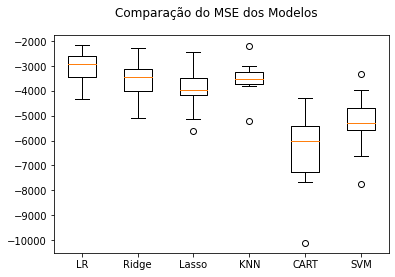

In [3]:
# Modelagem
 
# Definindo uma seed global para esta célula de código
np.random.seed(7) 
 
# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []
 
# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))
 
# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)
 
# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação do MSE dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

Analisando os resultados, verificamos que, considerando o MSE (e, consequentemente, o RMSE), o modelo treinado com a Árvore de Regressão apresentou os melhores resultados (valores de erro menores) indicando que possivelmente seguiríamos com a Árvore de Regressão como escolha de algoritmo. Neste caso, construiremos um novo modelo, treinado com toda a base de treino. Este modelo será avaliado utilizando a base de teste:


In [4]:
# Criando um modelo com todo o conjunto de treino
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
 
# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 
 
# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 4512.10
RMSE 67.17


Assim como no exemplo do problema de classificação, ressaltamos que esse é um exemplo simples, apenas para ilustrar a aplicação de algoritmos de Machine Learning em problemas de regressão. Em problemas reais (com dados mais "sujos" e complexos), iríamos provavelmente trabalhar com algumas operações de pré-processamento de dados (tais como Normalização e Padronização, para dados quantitativos, e One-Hot-Encoding, para dados qualitativos nominais) e também experimentar variar os hiperparâmetros dos algoritmos, o que resultaria em um código mais complexo, como veremos nas próximas seções.